In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

84.94079476044124 -153.0716584030401
-41.91969058853408 100.97657229306856
-88.60922539642839 -46.104186165951404
81.95622144124866 -59.51880024532339
-66.74058462094422 92.82496810390103
-82.79880154404493 -120.14431706584486
11.407767888271366 52.41257347364461
21.470432687553796 44.74201318397007
-88.20984290675788 -35.751257399741206
-42.1394625124746 7.162301193681742
-73.83934577556812 156.5685667783144
-0.5758896617457765 -6.743272975966249
-79.1083401743394 54.56773121853249
-88.85705553619115 -49.37925641849702
36.12706983530492 -20.166871708668054
4.692772860918865 -154.3974950787634
-80.41900170447494 63.80996403869415
24.044023145433826 -160.86179755628362
-67.22663916538201 -135.3703690761478
-80.18161497081985 84.0379387061505
42.175633407663895 160.12722622443835
69.92236187436345 160.51600901285366
-0.7593847144948143 85.985874284874
-32.79108006357808 167.0867204810836
13.45738976470804 122.55237052434609
-38.28158091125137 124.47266274025105
73.16008047598623 -43.3230

In [19]:
from citipy import citipy


In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [22]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [24]:
# Starting URL for weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | bargal
City not found. Skipping...
Processing Record 7 of Set 1 | riyadh
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | tabou
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | hambantota
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | tayuman
Processing Record 22 of Set 1 | 

In [27]:
len(city_data)

582

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,20.70,88,65,10.25,US,2022-10-18 18:55:35
1,Busselton,-33.6500,115.3333,52.50,92,8,8.28,AU,2022-10-18 18:55:35
2,Ushuaia,-54.8000,-68.3000,47.82,87,75,26.46,AR,2022-10-18 18:55:36
3,Upernavik,72.7868,-56.1549,29.17,79,100,17.09,GL,2022-10-18 18:55:36
4,Punta Arenas,-53.1500,-70.9167,57.31,54,20,36.82,CL,2022-10-18 18:54:46
5,Riyadh,24.6877,46.7219,78.94,13,73,3.65,SA,2022-10-18 18:51:07
6,Cape Town,-33.9258,18.4232,65.12,86,20,17.27,ZA,2022-10-18 18:53:05
7,Bluff,-46.6000,168.3333,46.27,76,67,16.55,NZ,2022-10-18 18:55:37
8,Tabou,4.4230,-7.3528,77.63,86,33,5.88,CI,2022-10-18 18:55:38
9,East London,-33.0153,27.9116,68.94,94,75,5.75,ZA,2022-10-18 18:55:38


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [32]:
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-10-18 18:55:35,71.2906,-156.7887,20.70,88,65,10.25
1,Busselton,AU,2022-10-18 18:55:35,-33.6500,115.3333,52.50,92,8,8.28
2,Ushuaia,AR,2022-10-18 18:55:36,-54.8000,-68.3000,47.82,87,75,26.46
3,Upernavik,GL,2022-10-18 18:55:36,72.7868,-56.1549,29.17,79,100,17.09
4,Punta Arenas,CL,2022-10-18 18:54:46,-53.1500,-70.9167,57.31,54,20,36.82
...,...,...,...,...,...,...,...,...,...
577,Nouakchott,MR,2022-10-18 19:08:40,18.0858,-15.9785,85.93,61,100,7.65
578,Peno,RU,2022-10-18 19:12:39,56.9262,32.7426,42.80,92,100,4.65
579,Vypolzovo,RU,2022-10-18 19:12:39,57.8767,33.6986,42.64,94,100,6.29
580,Sunrise Manor,US,2022-10-18 19:08:44,36.2111,-115.0731,84.29,17,0,11.50


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1666122273.4482484

In [37]:
# today's date 
today = time.strftime("%x")
today

'10/18/22'

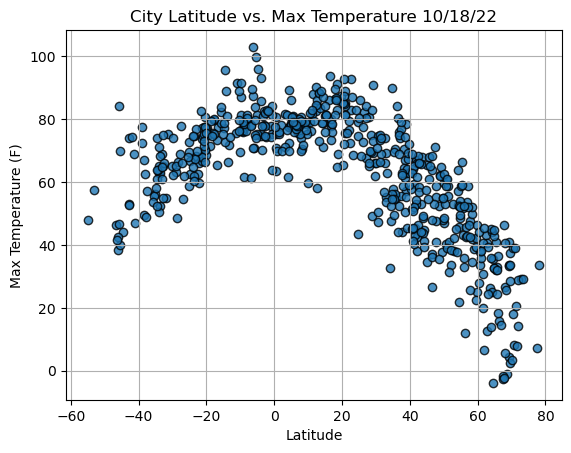

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

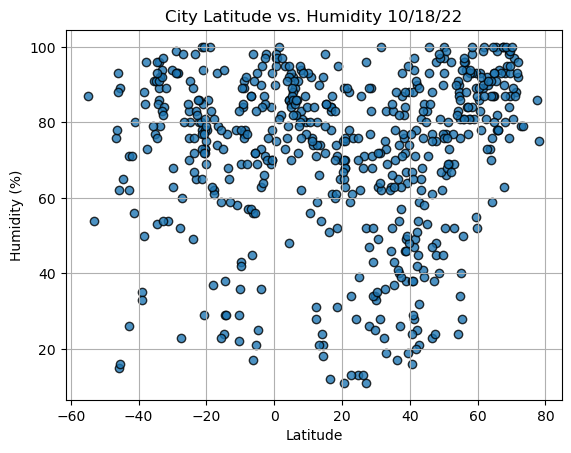

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

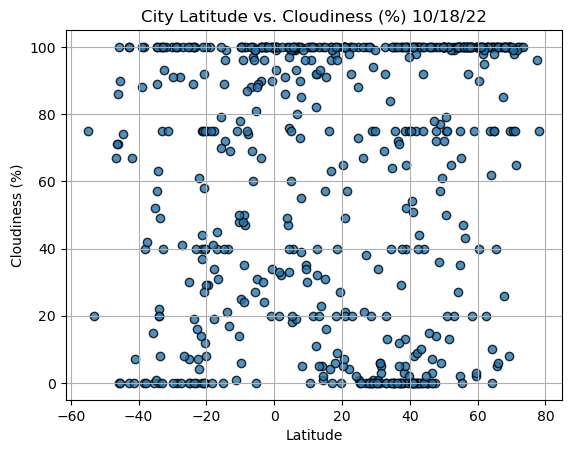

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

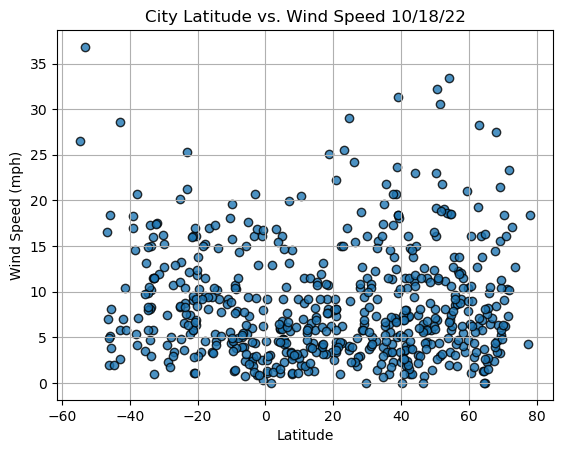

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
# Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-10-18 18:55:40
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    68.41
Humidity                       65
Cloudiness                      0
Wind Speed                  21.25
Name: 13, dtype: object

In [66]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
577     True
578     True
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [67]:
# Northern Hemisphere latitudes
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-10-18 18:55:35,71.2906,-156.7887,20.70,88,65,10.25
3,Upernavik,GL,2022-10-18 18:55:36,72.7868,-56.1549,29.17,79,100,17.09
5,Riyadh,SA,2022-10-18 18:51:07,24.6877,46.7219,78.94,13,73,3.65
8,Tabou,CI,2022-10-18 18:55:38,4.4230,-7.3528,77.63,86,33,5.88
10,Ponta Do Sol,PT,2022-10-18 18:55:39,32.6667,-17.1000,74.03,75,92,7.36
...,...,...,...,...,...,...,...,...,...
577,Nouakchott,MR,2022-10-18 19:08:40,18.0858,-15.9785,85.93,61,100,7.65
578,Peno,RU,2022-10-18 19:12:39,56.9262,32.7426,42.80,92,100,4.65
579,Vypolzovo,RU,2022-10-18 19:12:39,57.8767,33.6986,42.64,94,100,6.29
580,Sunrise Manor,US,2022-10-18 19:08:44,36.2111,-115.0731,84.29,17,0,11.50


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

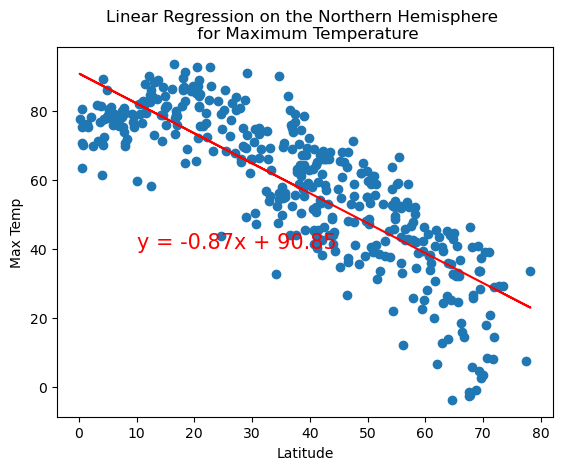

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

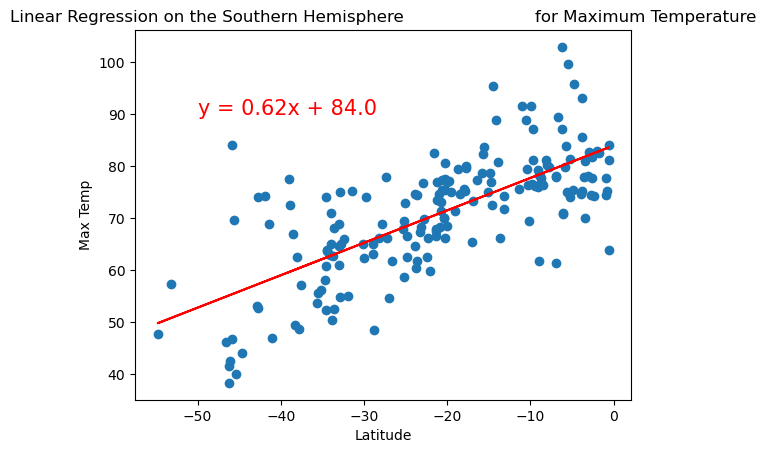

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

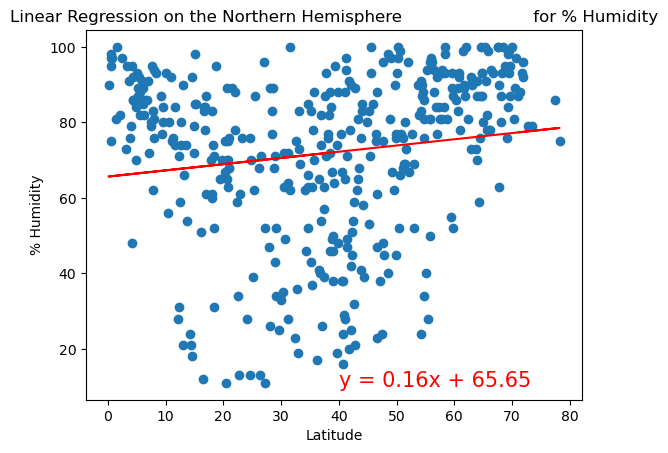

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

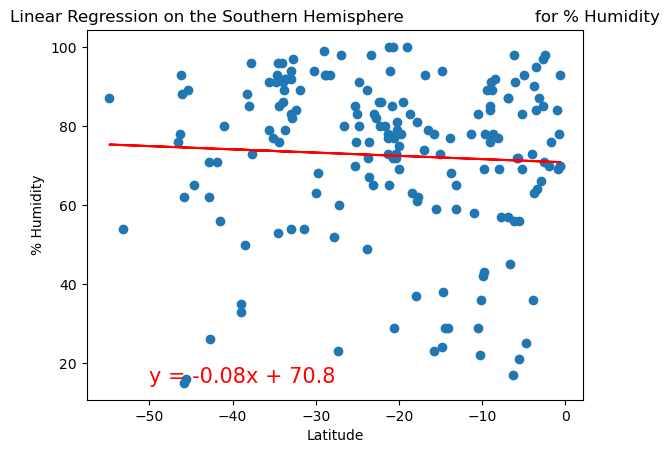

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

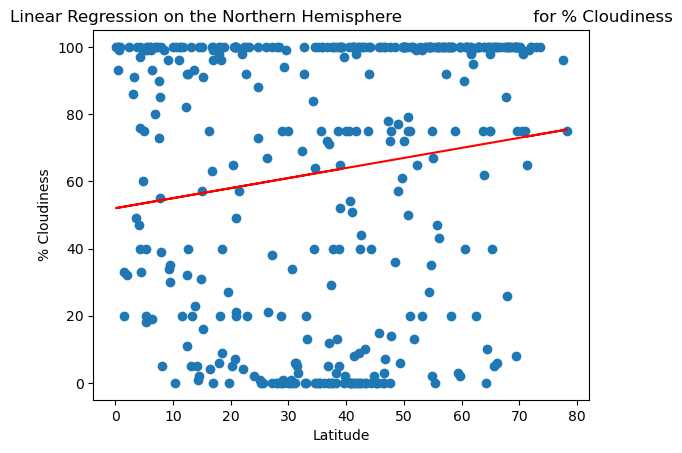

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

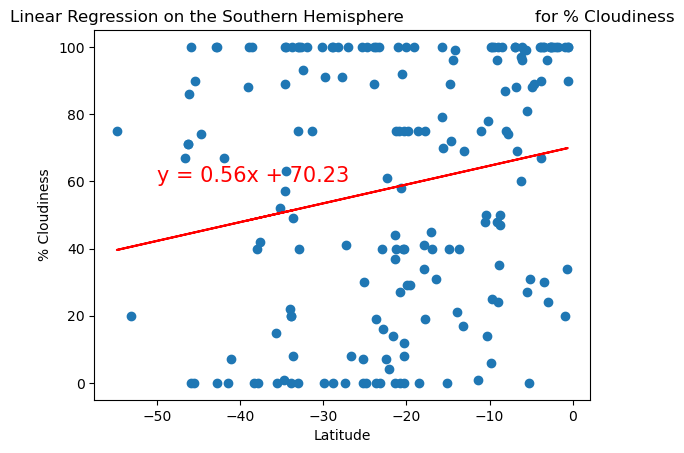

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

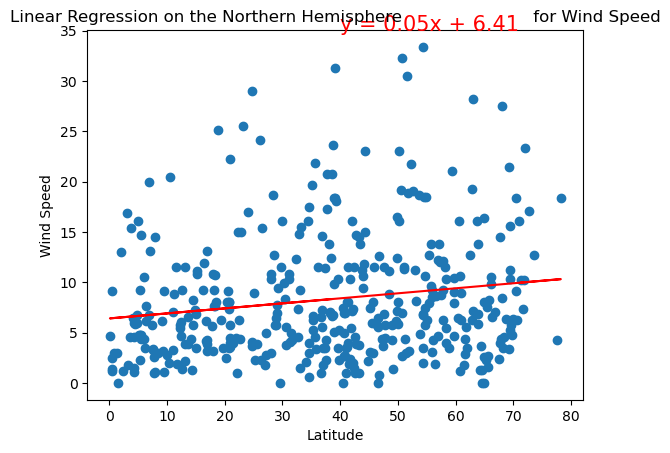

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

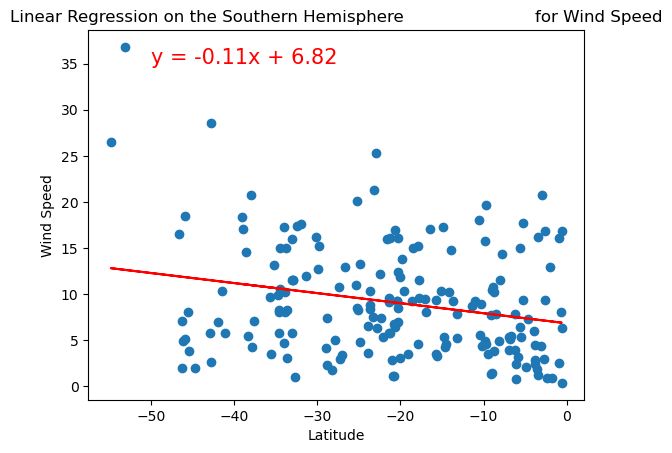

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))